# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("newkeys.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
btc_amount = 5
eth_amount = 10

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_data = btc_response.json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_data = eth_response.json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_amount*btc_price
my_eth_value = eth_amount*eth_price

# Print current crypto wallet balance
print(f"The current current BTC price is ${btc_price:0.2f}")
print(f"The current current ETH price is ${eth_price:0.2f}")

print(f"The current value of your {btc_amount} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {eth_amount} ETH is ${my_eth_value:0.2f}")

The current current BTC price is $58970.00
The current current ETH price is $1852.25
The current value of your 5 BTC is $294850.00
The current value of your 10 ETH is $18522.50


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_spy = 500
my_agg = 1000

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-26", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Preview DataFrame
df_portfolio

AGG                                       SPY  \
                             open     high     low   close   volume    open   
time                                                                          
2021-03-26 00:00:00-04:00  113.91  114.075  113.86  113.93  3287634  390.93   

                                                             
                             high     low   close    volume  
time                                                         
2021-03-26 00:00:00-04:00  396.41  390.29  395.99  90959116

In [9]:
# Pick AGG and SPY close prices

# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of AGG and SPY
df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices

AGG     SPY
2021-03-26  113.93  395.99

In [10]:
agg_close_price = df_closing_prices.iloc[0][0]
spy_close_price = df_closing_prices.iloc[0][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.93
Current SPY closing price: $395.99


In [11]:
# Compute the current value of shares
my_spy_value = my_spy*spy_close_price
my_agg_value = my_agg*agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 500 SPY shares is $197995.00
The current value of your 1000 AGG shares is $113930.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 10000

# Create savings DataFrame
df_saving = pd.DataFrame()

df_savings = pd.DataFrame({"amount":[my_btc_value+my_eth_value,my_spy_value+my_agg_value]})
df_savings.index = ['crypto','shares']

# Display savings DataFrame
display(df_savings)

amount
crypto  313372.5
shares  311925.0

<AxesSubplot:ylabel='amount'>

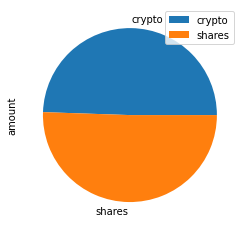

In [18]:
# Plot savings pie chart
df_savings.plot.pie(y='amount')

In [13]:
# Set ideal emergency fund

emergency_fund = monthly_income * 3
print(f"Your ideal emergency fund is ${emergency_fund:0.2f}")


Your ideal emergency fund is $30000.00


In [14]:
# Calculate total amount of savings

total_savings = df_savings.sum()
total_savings = float(total_savings)
print(f"Your total amount of savings is ${total_savings:0.2f}")

Your total amount of savings is $625297.50


In [15]:
#Validate saving health

if total_savings > emergency_fund:
    print(f"Congratulations you have more than 3 times your income in emergency funds, your savings is ${total_savings:0.2f}")
elif total_savings == emergency_fund:
    print(f"Your emergency fund is three (3) times your income ${emergency_fund:0.2f}")
elif total_savings < emergency_fund:
    print(f'You need thos amount of money ${emergency_fund-total_savings} to reach your emergency fund')

Congratulations you have more than 3 times your income in emergency funds, your savings is $625297.50


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [27]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-03-29', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-29', tz='America/New_York').isoformat()

In [28]:
# Get 5 years' worth of historical data for SPY and AGG
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

# Set timeframe to '1D'
timeframe = "1D"


# Set the ticker information
tickers = ["SPY","AGG"]

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df


# Display sample data
df_stock_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-04-06 00:00:00-04:00  108.64  108.71  108.4800  108.67  1599535.0   
2017-04-07 00:00:00-04:00  108.80  108.89  108.4200  108.44  1668826.0   
2017-04-10 00:00:00-04:00  108.53  108.65  108.4901  108.57  1751500.0   
2017-04-11 00:00:00-04:00  108.76  108.98  108.7500  108.90  2054745.0   
2017-04-12 00:00:00-04:00  108.93  109.20  108.8900  109.14  2243678.0   

                              SPY                                       
                             open     high     low   close      volume  
time                                                                    
2017-04-06 00:00:00-04:00     NaN      NaN     NaN     NaN         NaN  
2017-04-07 00:00:00-04:00  235.15  236.000  234.64  235.17  53293901.0  
2017-04-10 00:00:00-04:00  235.36  236.255  234.73  235.32  46610548.0  
2017-04-11 00:00:00-04:00  234.87  235.180  233.34  235.04  63951745.0  
2017-04-12 00:00:00-04:00  234.74  234.960  233.77  234.10  55338215.0

In [35]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
#?MCSimulation

num_sims = 500

MC_thirty = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [36]:
# Printing the simulation input data
MC_thirty.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-04-06 00:00:00-04:00  108.64  108.71  108.4800  108.67  1599535.0   
2017-04-07 00:00:00-04:00  108.80  108.89  108.4200  108.44  1668826.0   
2017-04-10 00:00:00-04:00  108.53  108.65  108.4901  108.57  1751500.0   
2017-04-11 00:00:00-04:00  108.76  108.98  108.7500  108.90  2054745.0   
2017-04-12 00:00:00-04:00  108.93  109.20  108.8900  109.14  2243678.0   

                                           SPY                           \
                          daily_return    open     high     low   close   
time                                                                      
2017-04-06 00:00:00-04:00          NaN     NaN      NaN     NaN     NaN   
2017-04-07 00:00:00-04:00    -0.002116  235.15  236.000  234.64  235.17   
2017-04-10 00:00:00-04:00     0.001199  235.36  236.255  234.73  235.32   
2017-04-11 00:00:00-04:00     0.003040  234.87  235.180  233.34  235.04   
2017-04-12 00:00:00-04:00     0.002204  234.74  234.960  233.77  234.10   

                                                    
                               volume daily_return  
time                                                
2017-04-06 00:00:00-04:00         NaN          NaN  
2017-04-07 00:00:00-04:00  53293901.0          NaN  
2017-04-10 00:00:00-04:00  46610548.0     0.000638  
2017-04-11 00:00:00-04:00  63951745.0    -0.001190  
2017-04-12 00:00:00-04:00  55338215.0    -0.003999

In [38]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1         2          3          4          5    \
0      1.000000   1.000000  1.000000   1.000000   1.000000   1.000000   
1      1.003142   0.993654  1.002012   1.008334   1.002172   1.000086   
2      1.000900   0.983916  1.008460   1.020020   1.003402   1.010329   
3      0.991630   0.976696  1.004835   1.021304   1.008121   1.024870   
4      0.994672   0.986845  1.010489   1.018196   1.006683   1.025072   
...         ...        ...       ...        ...        ...        ...   
7556  20.338076  12.712023  8.005665  12.012401  16.993055  27.838165   
7557  20.431878  12.737187  7.996484  11.949772  17.027353  27.618586   
7558  20.543622  12.800943  7.998841  11.887512  16.947271  27.860182   
7559  20.877282  12.734613  8.084537  11.900680  16.949292  27.846225   
7560  20.873671  12.758945  8.164174  11.977864  16.959182  27.680653   

            6         7         8         9    ...        490        491  \
0      1.000000  1.000000  1.000000  1.000000  ...   1.000000   1.000000   
1      1.012996  0.990990  0.995393  0.994849  ...   0.997345   1.003258   
2      1.012261  1.006880  0.981506  0.996836  ...   0.994206   1.015383   
3      1.007436  1.015381  0.981951  1.002322  ...   0.998703   1.028623   
4      1.000716  1.007834  0.983349  0.994007  ...   0.990989   1.047623   
...         ...       ...       ...       ...  ...        ...        ...   
7556  17.247093  8.520053  9.389764  3.242416  ...  13.532880  18.277341   
7557  17.160935  8.582350  9.506296  3.246714  ...  13.441307  18.242872   
7558  17.145878  8.525560  9.496980  3.263898  ...  13.377499  18.189505   
7559  17.170187  8.535532  9.477894  3.268848  ...  13.315632  18.081847   
7560  17.294287  8.416932  9.444592  3.291006  ...  13.377382  18.251632   

           492        493        494       495        496        497  \
0     1.000000   1.000000   1.000000  1.000000   1.000000   1.000000   
1     0.999676   0.992610   1.005513  1.000332   0.996895   1.005187   
2     0.998030   0.990044   1.008893  0.995277   0.994721   1.018812   
3     1.002627   0.988241   1.013401  0.988495   0.999525   1.022753   
4     1.007914   0.995850   1.012987  0.981353   0.996545   1.031664   
...        ...        ...        ...       ...        ...        ...   
7556  7.257863  14.526284  18.566760  5.227706  11.203549  11.384647   
7557  7.313916  14.586458  18.489934  5.246159  11.336760  11.440630   
7558  7.304270  14.654858  18.480127  5.233462  11.487746  11.399189   
7559  7.361164  14.944585  18.470534  5.207264  11.422115  11.384453   
7560  7.372107  15.106127  18.233176  5.242974  11.583760  11.265814   

           498       499  
0     1.000000  1.000000  
1     0.996950  1.007992  
2     1.001738  1.011599  
3     1.001242  1.018319  
4     1.006197  1.012488  
...        ...       ...  
7556  7.376638  6.739103  
7557  7.370136  6.747113  
7558  7.441687  6.787302  
7559  7.496308  6.787302  
7560  7.540045  6.843662  

[7561 rows x 500 columns]

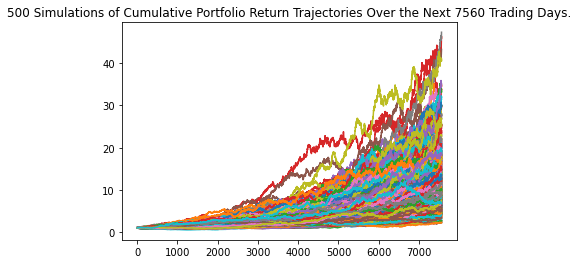

In [40]:
# Plot simulation outcomes
line_plot = MC_thirty.plot_simulation()

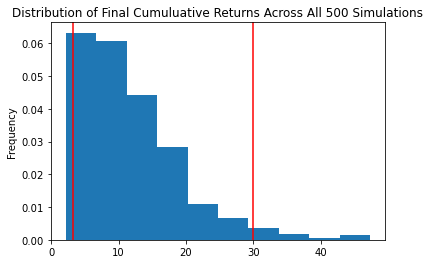

In [41]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty.plot_distribution()

### Retirement Analysis

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             11.729281
std               7.240491
min               2.135366
25%               6.202733
50%               9.935589
75%              15.290630
max              47.352469
95% CI Lower      3.233501
95% CI Upper     29.910574
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [43]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $64670.01 and $598211.48


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [44]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $97005.02 and $897317.21


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [46]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.989687  1.014192  0.998450  1.001927  0.997290  0.997359  0.995566   
2     0.985950  1.014103  1.004804  1.003743  0.992191  0.991666  0.992996   
3     0.984052  1.013918  1.003380  0.990283  0.993921  0.991858  0.994080   
4     0.987163  1.008931  1.009911  0.997018  0.990110  0.987178  0.999523   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.729998  1.734552  1.674357  1.462263  0.985730  1.768432  1.378986   
1257  1.721293  1.741773  1.681463  1.449528  0.990159  1.763915  1.374134   
1258  1.716410  1.735307  1.693635  1.447455  0.988309  1.763553  1.375521   
1259  1.718081  1.727532  1.705906  1.444826  0.983725  1.751790  1.375864   
1260  1.731425  1.724366  1.707378  1.421532  0.974895  1.744541  1.379589   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.000407  0.999021  0.998657  ...  0.986620  1.002164  0.998226   
2     0.999656  1.004010  0.995348  ...  0.983348  1.019382  0.995698   
3     1.001068  1.008622  0.989039  ...  0.989986  1.017431  0.993826   
4     1.004317  1.007958  0.991922  ...  1.001684  1.023418  0.995106   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.223787  1.201882  1.571635  ...  1.694623  1.847904  1.452154   
1257  1.227812  1.190964  1.569020  ...  1.690342  1.849958  1.467714   
1258  1.229709  1.189660  1.562242  ...  1.695304  1.852249  1.471895   
1259  1.224541  1.185998  1.553066  ...  1.684645  1.865872  1.475247   
1260  1.227650  1.178228  1.554858  ...  1.683585  1.883973  1.452852   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.996925  0.998338  1.006615  0.985200  0.997786  0.997415  1.001889  
2     1.000422  0.989544  1.010645  0.975404  1.002418  1.005060  1.000208  
3     0.998305  0.994070  1.010202  0.982410  1.006654  1.005732  0.997322  
4     0.994150  0.993986  1.014562  0.982953  1.015761  1.007587  1.003346  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.384087  1.376539  1.118275  1.479314  1.561473  1.114849  1.176295  
1257  1.394434  1.390837  1.126733  1.499018  1.558343  1.116190  1.168349  
1258  1.401319  1.392327  1.131800  1.517410  1.561826  1.124554  1.173697  
1259  1.395171  1.380441  1.134498  1.512019  1.569237  1.119335  1.174279  
1260  1.391302  1.388476  1.129163  1.504301  1.562758  1.114831  1.181324  

[1261 rows x 500 columns]

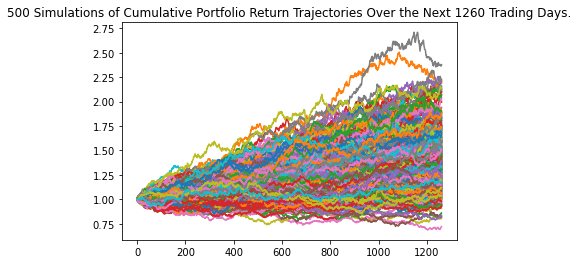

In [47]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

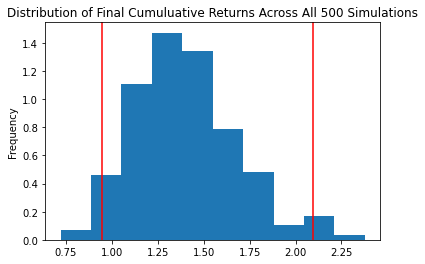

In [48]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.398850
std               0.277850
min               0.720975
25%               1.206115
50%               1.373624
75%               1.573669
max               2.377297
95% CI Lower      0.946932
95% CI Upper      2.097396
Name: 1260, dtype: float64


In [51]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56815.93 and $125843.77


### Ten Years Retirement Option

In [52]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [53]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.004902  1.014801  0.997288  0.995262  1.011319  1.004492  0.986546   
2     1.002517  1.011154  1.010596  0.997515  1.025164  1.003201  0.986580   
3     0.998432  1.015553  1.016109  0.999022  1.021269  1.006159  0.978536   
4     1.003702  1.024322  1.023484  0.989415  1.016372  1.004764  0.975689   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.584876  1.402882  1.432245  1.396149  1.157835  1.018431  1.387572   
1257  1.579253  1.415493  1.435266  1.401803  1.158245  1.021688  1.376223   
1258  1.584615  1.407586  1.446956  1.402139  1.157024  1.025065  1.374512   
1259  1.590524  1.407014  1.451788  1.405990  1.147620  1.029866  1.384350   
1260  1.579802  1.414309  1.456430  1.412615  1.140630  1.036076  1.382294   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.995104  1.007615  1.000222  ...  1.000684  1.001128  1.006716   
2     1.000052  1.012693  0.999387  ...  0.991365  1.003313  1.000077   
3     1.001004  1.018853  1.009612  ...  0.990133  1.007137  1.008630   
4     0.990035  1.017118  1.007372  ...  0.993748  1.001038  1.004030   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.764610  1.876582  1.504273  ...  1.015861  1.300327  1.356535   
1257  1.772504  1.884189  1.502017  ...  1.016128  1.303142  1.365388   
1258  1.776509  1.860218  1.486790  ...  1.024298  1.305598  1.352234   
1259  1.766037  1.854686  1.482900  ...  1.024926  1.301654  1.356377   
1260  1.757241  1.872279  1.480642  ...  1.021410  1.310663  1.352252   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.994257  1.001068  0.999226  0.998407  0.996552  1.001326  1.001360  
2     0.990682  1.000891  0.992790  1.001985  0.990704  1.000514  1.001686  
3     0.999037  1.001870  1.003394  1.004535  0.988956  1.005540  1.006725  
4     0.990666  0.991454  1.004698  1.008432  0.989349  1.013241  1.003572  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.417407  1.181057  1.389162  1.165630  1.716808  1.304693  1.117384  
1257  1.421768  1.185202  1.394095  1.172442  1.720889  1.321005  1.113688  
1258  1.427057  1.186560  1.386571  1.173424  1.731186  1.312895  1.107286  
1259  1.413049  1.201080  1.397037  1.175708  1.737246  1.317828  1.107375  
1260  1.409096  1.203437  1.397326  1.181912  1.757924  1.317010  1.108400  

[1261 rows x 500 columns]

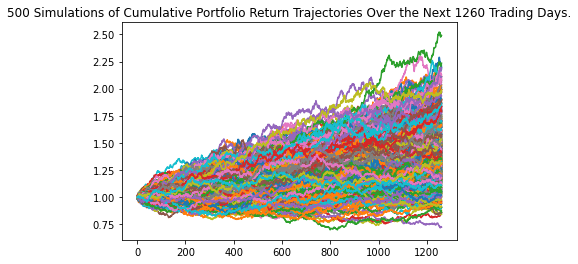

In [54]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

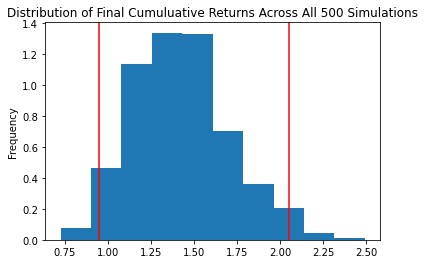

In [55]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

In [56]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.424016
std               0.276800
min               0.725833
25%               1.225053
50%               1.412163
75%               1.579835
max               2.491104
95% CI Lower      0.946835
95% CI Upper      2.050892
Name: 1260, dtype: float64


In [58]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $56810.1 and $123053.52
